In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("covid_19_clean_complete.csv")

# View the first 5 rows
df.head()


FileNotFoundError: [Errno 2] No such file or directory: 'covid_19_clean_complete.csv'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('covid_19_clean_complete.csv', parse_dates=['Date'])
print(df.head())  # Check first 5 rows
print(df.info())  # Check missing values & data types

FileNotFoundError: [Errno 2] No such file or directory: 'covid_19_clean_complete.csv'

In [4]:
# Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set default plot style
sns.set(style="darkgrid")


In [5]:
# Load the dataset
df = pd.read_csv("covid_19_clean_complete.csv", parse_dates=['Date'])

# Show the first 5 rows
df.head()


FileNotFoundError: [Errno 2] No such file or directory: 'covid_19_clean_complete.csv'

In [6]:
df = pd.read_csv("covid_19_clean_complete.csv", parse_dates=['Date'])
df.head()


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [7]:
# Load the dataset
df = pd.read_csv("covid_19_clean_complete.csv", parse_dates=["Date"])


In [8]:
# Show the first 5 rows of the dataset
print(df.head())


  Province/State Country/Region       Lat       Long       Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953 2020-01-22          0   
1            NaN        Albania  41.15330  20.168300 2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600 2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800 2020-01-22          0   
4            NaN         Angola -11.20270  17.873900 2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa  


In [9]:
# Show the data types, column names, and missing values
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB
None


In [10]:
# Drop location-related columns
df = df.drop(['Lat', 'Long', 'Province/State'], axis=1)


In [11]:
# Rename columns
df = df.rename(columns={'Country/Region': 'Country', 'Date': 'Date'})


In [12]:
# Replace all missing values with 0
df.fillna(0, inplace=True)


In [13]:
# Recheck for missing values
df.isnull().sum()

# Preview final structure
df.head()


,Country,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Afghanistan,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Albania,2020-01-22,0,0,0,0,Europe
2,Algeria,2020-01-22,0,0,0,0,Africa
3,Andorra,2020-01-22,0,0,0,0,Europe
4,Angola,2020-01-22,0,0,0,0,Africa


In [14]:
# Total confirmed cases and deaths worldwide
total_cases = df['Confirmed'].sum()
total_deaths = df['Deaths'].sum()

print(f"Total cases: {total_cases:,}")
print(f"Total deaths: {total_deaths:,}")


Total cases: 828,508,482
Total deaths: 43,384,903


In [15]:
# Calculate fatality rate
fatality_rate = (total_deaths / total_cases) * 100
print(f"Global fatality rate: {fatality_rate:.2f}%")


Global fatality rate: 5.24%


In [16]:
# Group by Date to get total confirmed cases per day
daily_cases = df.groupby('Date')['Confirmed'].sum().reset_index()


C:\Users\Arya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Arya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


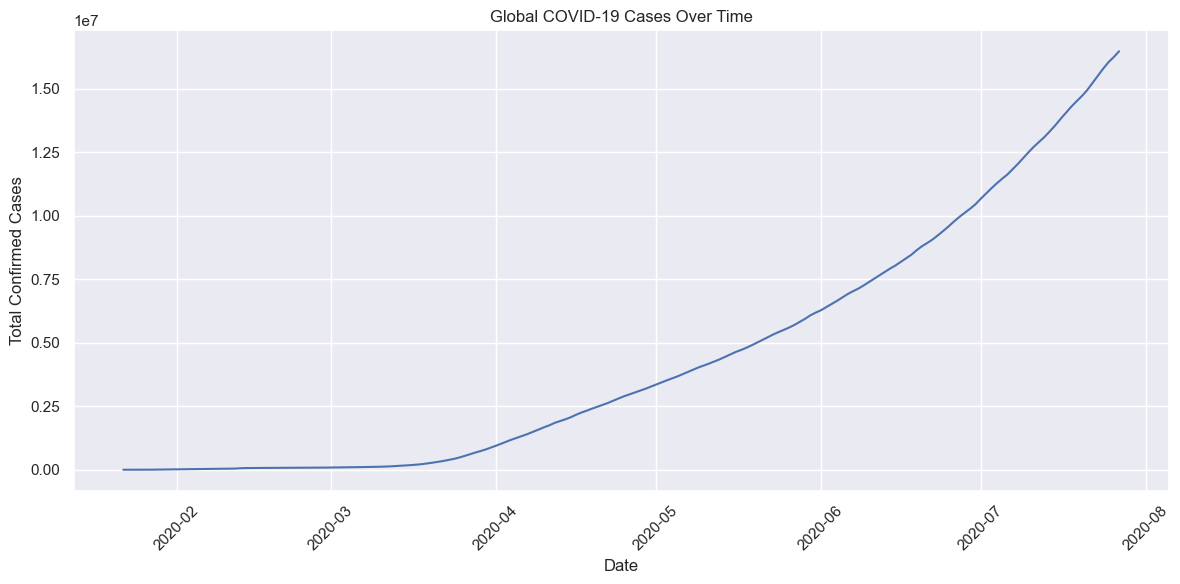

In [17]:
# Plot daily global confirmed cases
plt.figure(figsize=(12, 6))  # Set the plot size
sns.lineplot(x='Date', y='Confirmed', data=daily_cases)
plt.title('Global COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Confirmed Cases')
plt.xticks(rotation=45)  # Rotate x-axis dates for better visibility
plt.tight_layout()       # Prevent labels from overlapping
plt.show()


In [18]:
# Top 5 countries with the highest total confirmed cases
top_countries = df.groupby('Country')['Confirmed'].max().nlargest(5)


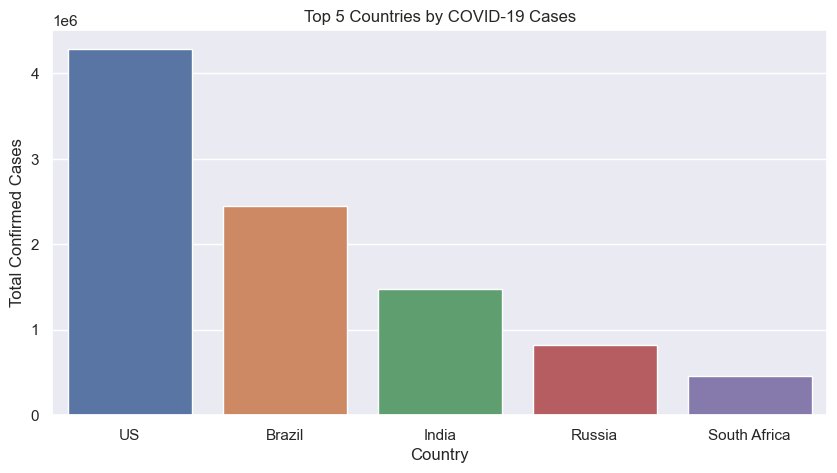

In [19]:
# Plot the top 5 countries
plt.figure(figsize=(10, 5))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Top 5 Countries by COVID-19 Cases')
plt.ylabel('Total Confirmed Cases')
plt.xlabel('Country')
plt.show()


In [20]:
# Group by country and calculate total deaths and confirmed
country_stats = df.groupby('Country').agg({'Deaths': 'sum', 'Confirmed': 'sum'})

# Calculate fatality rate
country_stats['FatalityRate'] = (country_stats['Deaths'] / country_stats['Confirmed']) * 100


In [21]:
# Plot fatality rate bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x=high_fatality.index, y=high_fatality['FatalityRate'], palette='rocket')
plt.title('Top 5 Countries by Fatality Rate (%)')
plt.ylabel('Fatality Rate (%)')
plt.xlabel('Country')
plt.tight_layout()
plt.show()


NameError: name 'high_fatality' is not defined

<Figure size 1000x500 with 0 Axes>

In [22]:
# Group by country and calculate total deaths and confirmed cases
country_stats = df.groupby('Country').agg({'Deaths': 'sum', 'Confirmed': 'sum'})

# Calculate fatality rate (%) = (deaths / confirmed) * 100
country_stats['FatalityRate'] = (country_stats['Deaths'] / country_stats['Confirmed']) * 100

# Show top 5 countries with the highest fatality rate
high_fatality = country_stats.nlargest(5, 'FatalityRate')
print(high_fatality[['Deaths', 'Confirmed', 'FatalityRate']])


                 Deaths  Confirmed  FatalityRate
Country                                         
Yemen             17707      67180     26.357547
Belgium          963679    6281116     15.342481
United Kingdom  3997775   26748587     14.945743
France          3048524   21210926     14.372423
Italy           3707717   26745145     13.863140


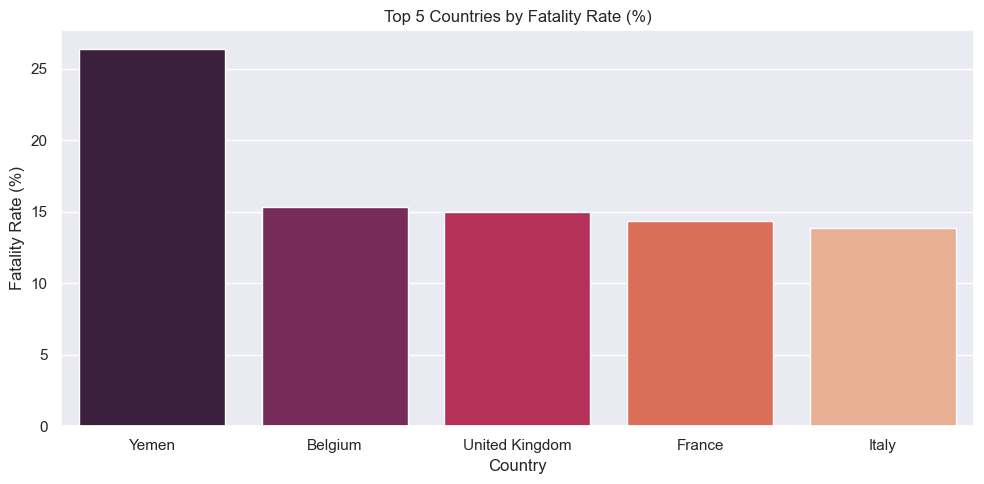

In [23]:
# Plot fatality rate bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x=high_fatality.index, y=high_fatality['FatalityRate'], palette='rocket')
plt.title('Top 5 Countries by Fatality Rate (%)')
plt.ylabel('Fatality Rate (%)')
plt.xlabel('Country')
plt.tight_layout()
plt.show()


In [24]:
# Export the cleaned data to CSV (for Power BI/Tableau)
df.to_csv('cleaned_covid_data.csv', index=False)
